In [1]:
print("Hello, World!")

Hello, World!


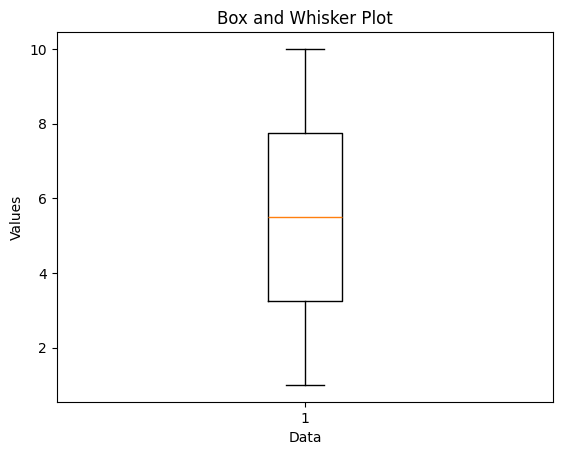

In [1]:
import matplotlib.pyplot as plt

# Assuming you have a list of data called 'data'
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Generate the box and whisker plot
plt.boxplot(data)

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box and Whisker Plot')

# Show the plot
plt.show()


In [7]:
import requests
from ipython_secrets import *

# Set the API key and repository URL
api_key = get_secret('GITHUB_API_KEY')
repo_url = 'https://api.github.com/repos/OWNER/REPO'

# Set the headers with the API key
headers = {
    'Authorization': f'token {api_key}',
    'Accept': 'application/vnd.github.v3+json'
}

# Make a GET request to the repository URL
response = requests.get(repo_url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Print the response content
    print(response.json())
else:
    # Print the error message
    print(f'Request failed with status code {response.status_code}: {response.text}')


Request failed with status code 401: {"message":"Bad credentials","documentation_url":"https://docs.github.com/rest"}


In [8]:
# Function to convert name to something funny
def convert_name_to_funny(name):
    # API endpoint URL
    url = f"https://api.funtranslations.com/translate/funny.json?text={name}"

    # Make a GET request to the API
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract the translated text from the response
        translated_text = response.json()["contents"]["translated"]
        return translated_text
    else:
        # Print an error message if the request failed
        print(f"Request failed with status code {response.status_code}: {response.text}")
        return None

# Example usage
name = "Alice"
funny_name = convert_name_to_funny(name)
print(funny_name)

Request failed with status code 404: {
    "error": {
        "code": 404,
        "message": "Not Found"
    }
}
None


In [ ]:
import psycopg2
from flask import Flask, request

app = Flask(__name__)

@app.route('/do', methods=['GET'])
def do():
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(
        host="your_host",
        database="your_database",
        user="your_user",
        password="your_password"
    )
    cur = conn.cursor()
    
    name = request.args["name"]
    age = request.args["age"]
    date_of_birth = request.args["dob"]
    
    # Create a new table with a different name
    cur.execute("CREATE TABLE new_table (name VARCHAR, age INTEGER, date_of_birth DATE)")
    
    cur.execute("INSERT INTO new_table (name, age, date_of_birth) VALUES (" + name + f", {age}, {date_of_birth})")
    
    # Commit the changes to the database
    conn.commit()
    
    # Close the cursor and the connection
    cur.close()
    conn.close()
